# MARKETING DATA ANALYSIS | CUSTOMER SEGMENTATION

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings("ignore")

______

# Customer segmentation Case-study


### Data Source:

### . https://archive.ics.uci.edu/dataset/352/online+retail

In [3]:
retail_df = pd.read_excel("Online Retail.xlsx")
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
retail_df.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00,541909,541909.00,406829.00
mean,9.55,2011-07-04 13:34:57.156386048,4.61,15287.69
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


____________________________________

## Data preparation & Exploration

In [6]:
retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
retail_df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
retail_df.shape

(541909, 8)

In [9]:
retail_df["Description"]

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

In [10]:
retail_df.groupby("Description").agg({"Quantity" : "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [11]:
retail_df["InvoiceNo"].str.contains("C").count()

9291

In [12]:
retail_df[~retail_df["InvoiceNo"].str.contains("C", na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
retail_df["TotalPrice"] = retail_df["Quantity"] * retail_df["UnitPrice"]

In [14]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


_______________________________

## RFM Analysis

In [15]:
import datetime as dt

In [16]:
retail_df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [17]:
today_date = dt.datetime(2011, 12, 11)

In [18]:
rfm = retail_df.groupby("CustomerID").agg({"InvoiceDate" : lambda date: (today_date - date.max()).days,
                                          "InvoiceNo" : lambda num: num.nunique(),
                                          "TotalPrice": lambda TotalPrice:TotalPrice.sum()})
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [19]:
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [20]:
rfm = rfm[rfm["Monetary"] > 0]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
12352.0,37,11,1545.41
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [21]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4320.0,90.892130,99.142113,1.000000e+00,17.000,50.00,139.00,374.00
Frequency,4320.0,5.117130,9.386392,1.000000e+00,1.000,3.00,6.00,248.00
Monetary,4320.0,1924.373832,8264.936833,7.105427e-15,302.435,657.85,1626.26,279489.02


In [22]:
rfm["R"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])

In [23]:
rfm["F"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [24]:
rfm["M"] = pd.qcut(rfm["Monetary"], 5, labels=[5, 4, 3, 2, 1])

In [25]:
rfm.sample(10)

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
14488.0,52,2,1047.43,3,2,2
15396.0,113,1,288.18,2,1,4
13304.0,352,1,300.42,1,1,4
18117.0,26,1,320.72,4,2,4
12424.0,163,2,1760.96,2,2,2
13538.0,44,7,1280.85,3,5,2
17772.0,11,2,182.77,5,3,5
12929.0,123,2,105.10,2,2,5
16309.0,92,3,686.67,2,3,3


In [26]:
rfm["RFM_Segment"] = (rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str))

In [27]:
rfm["RFM_Score"] = rfm[["R", "F", "M"]].sum(axis = 1)

In [28]:
 rfm.sample(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
15723.0,365,1,203.10,1,1,5,115,7
16523.0,2,28,9295.67,5,5,1,551,11
18085.0,331,2,689.95,1,3,3,133,7
14860.0,9,2,168.62,5,2,5,525,12
14353.0,216,1,90.60,1,1,5,115,7
14245.0,177,5,1677.48,1,4,2,142,7
17388.0,78,4,1259.56,2,4,2,242,8
13327.0,39,9,3617.57,3,5,1,351,9
12576.0,36,6,1306.98,3,4,2,342,9


In [29]:
seg_map = {
    r"[1-2][1-2][1-5]": "hibernating",
    r"[1-2][3-4][1-5]": "at_Risk",
    r"[1-2]5[1-5]": "can't_loose",
    r"3[1-2][1-5]": "about_to_sleep",
    r"33[1-5]":"need_attention",
    r"[3-4][4-5][1-5]": "loyal_customers",
    r"41[1-5]": "promising",
    r"51[1-5]": "new_customers",
    r"[4-5][2-3][1-5]": "potential_loyalists",
    r'5[4-5][1-5]': 'champions'
    }
rfm["Segment"] = rfm["RFM_Segment"].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12347.0,3,7,4310.00,5,4,1,541,10,champions
12348.0,76,4,1797.24,2,3,2,232,7,at_Risk
12349.0,19,1,1757.55,4,1,2,412,7,promising
12350.0,311,1,334.40,1,1,4,114,6,hibernating
12352.0,37,11,1545.41,3,5,2,352,10,loyal_customers


In [30]:
rfm.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Recency,4320.0,90.89,99.14,1.0,17.00,50.00,139.00,374.00
Frequency,4320.0,5.12,9.39,1.0,1.00,3.00,6.00,248.00
Monetary,4320.0,1924.37,8264.94,0.0,302.44,657.85,1626.26,279489.02
RFM_Score,4320.0,9.02,1.80,3.0,8.00,9.00,10.00,15.00


___________________________________

# Data visualisation

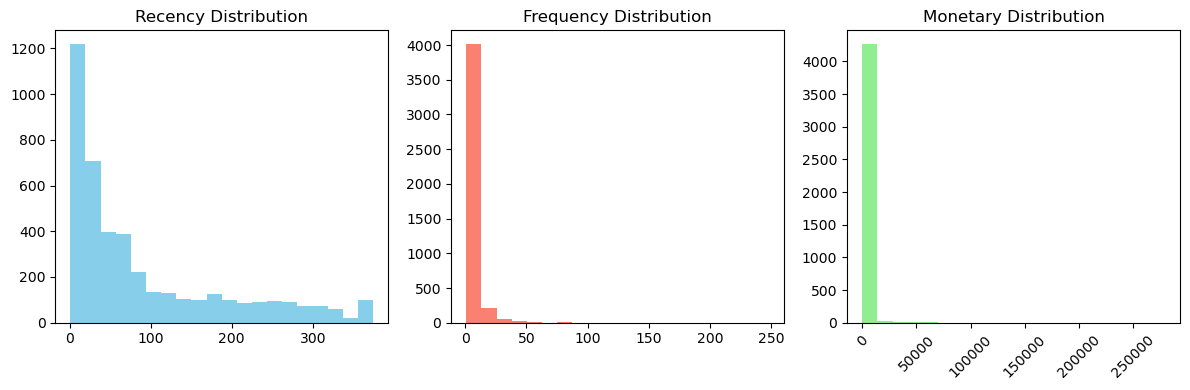

In [31]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(rfm['Recency'], bins=20, color='skyblue')
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
plt.hist(rfm['Frequency'], bins=20, color='salmon')
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
plt.hist(rfm['Monetary'], bins=20, color='lightgreen')
plt.title('Monetary Distribution')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

In [32]:
count_of_ones = (rfm['Frequency']).sum()
print("Number of numbers:", count_of_ones)

counts = rfm['Frequency'].value_counts().sort_index()

for num in range(1, 100):
    count = counts.get(num, 0)
    print(f"Number of {num}s:", count)

Number of numbers: 22106
Number of 1s: 1282
Number of 2s: 802
Number of 3s: 486
Number of 4s: 377
Number of 5s: 287
Number of 6s: 195
Number of 7s: 157
Number of 8s: 117
Number of 9s: 80
Number of 10s: 78
Number of 11s: 62
Number of 12s: 51
Number of 13s: 38
Number of 14s: 41
Number of 15s: 28
Number of 16s: 26
Number of 17s: 19
Number of 18s: 22
Number of 19s: 16
Number of 20s: 14
Number of 21s: 10
Number of 22s: 13
Number of 23s: 9
Number of 24s: 6
Number of 25s: 4
Number of 26s: 7
Number of 27s: 12
Number of 28s: 5
Number of 29s: 9
Number of 30s: 3
Number of 31s: 8
Number of 32s: 1
Number of 33s: 2
Number of 34s: 3
Number of 35s: 5
Number of 36s: 2
Number of 37s: 0
Number of 38s: 1
Number of 39s: 3
Number of 40s: 1
Number of 41s: 4
Number of 42s: 0
Number of 43s: 5
Number of 44s: 0
Number of 45s: 1
Number of 46s: 2
Number of 47s: 0
Number of 48s: 0
Number of 49s: 1
Number of 50s: 1
Number of 51s: 1
Number of 52s: 3
Number of 53s: 1
Number of 54s: 1
Number of 55s: 2
Number of 56s: 0


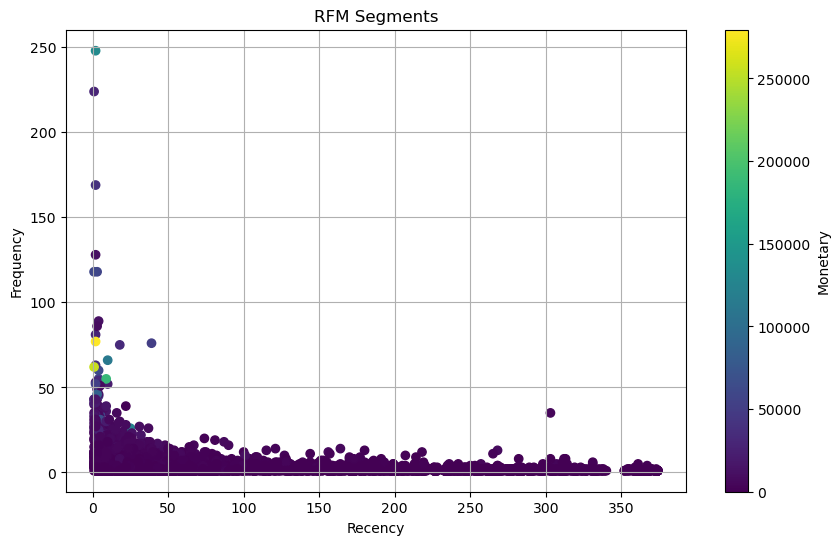

In [33]:
plt.figure(figsize=(10, 6))

plt.scatter(rfm['Recency'], rfm['Frequency'], c=rfm['Monetary'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Segments')
plt.colorbar(label='Monetary')
plt.grid(True)
plt.show()

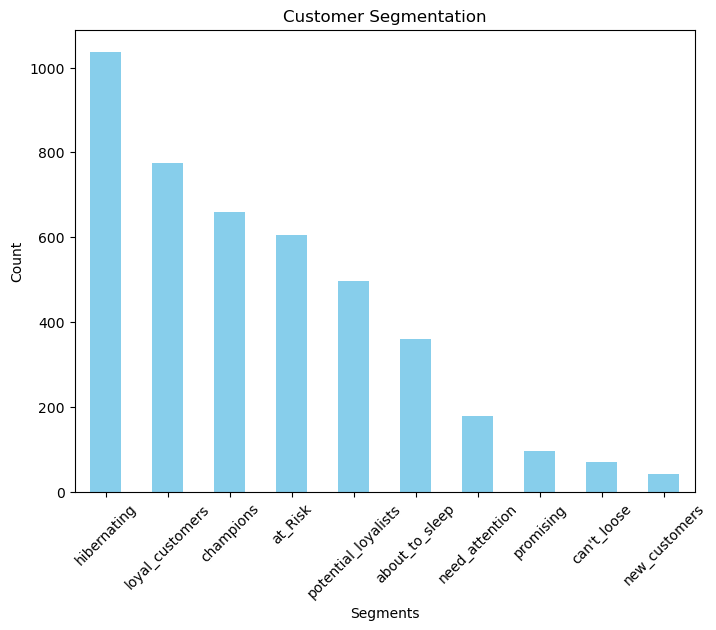

In [34]:
segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(8, 6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation')
plt.xlabel('Segments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()